1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

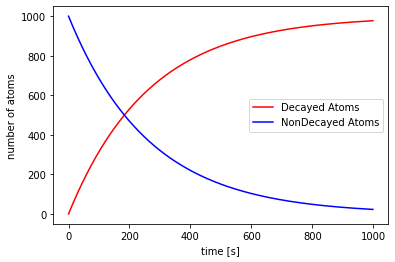

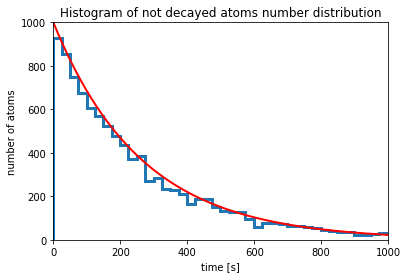

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

tau=3.052*60
N=1000         #TI

def p1(t):
    return (1-2**(-t/tau))

t=np.arange(0, 1000, 1)

#plot
plt.figure()
plt.plot(t, N*p1(t), color='r', label='Decayed Atoms')
plt.plot(t, N*(1-p1(t)),color='b',label='NonDecayed Atoms')
plt.xlabel('time [s]')
plt.ylabel('number of atoms')
plt.legend()
plt.show()


def p2(t, tau):
    return (2**(-t/tau) * math.log(2)/tau)

def p2_cdf(t, tau):
    return 1. - 2**(-t/tau)

# inverse cumulative distribution function
def p2_icdf(x,tau):
    t = -tau*np.log2(1-x)
    return t


u = np.random.random(10000)
v = p2_icdf(u, tau) # apply the inverse of the CDF

time = np.arange(0,1000,1) 

plt.figure()
plt.hist(v, histtype='step', bins=100, density=False, linewidth=3)
plt.plot(time, N*(1-p2_cdf(time,tau)), linewidth=2, color='red')
plt.axis([0, 1000, 0 ,1000])
plt.xlabel('time [s]')
plt.ylabel('number of atoms')
plt.title('Histogram of not decayed atoms number distribution')
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

The result with Hit/Miss Method : 1.34986
Mean =  1.348476 
Standard Deviation =  0.0025066918438451757 


Integral with the mean value method:  1.3479395406363204
Error: 0.002066763261059735


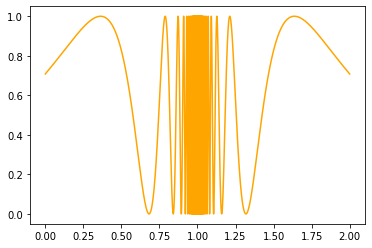

In [2]:
# Hit/Miss Method
# define the function
def f(x):
    return (np.sin(1/(1-x)))**2

N = 100000
x=np.linspace(0,2,N)
plt.plot(x,f(x),color = "orange")

#repeat the process for N times
count=0
for i in range(N):
    x=2*np.random.random() 
    y=np.random.random()
    if y<f(x): 
        count+=1
I1 = 2 * count / N

#calculate the error repeting the computation in order to find the mean and the std
I = np.zeros(10)
for k in range(10):
    count = 0
    for i in range(N):
        x=2*np.random.random()
        y=np.random.random()
        if y<f(x): 
            count += 1   
    I[k] = 2*count/N

mean = np.mean(I)
std = np.std(I)

print('The result with Hit/Miss Method :', I1)
print('Mean = ', mean, '\nStandard Deviation = ', std, '\n')

print()

# Mean Value Method
x = np.zeros(N)
y = np.zeros(N)
for i in range(N):
    x[i] = 2*np.random.random()  
    y[i] = f(x[i])  
a=-1
b=1
I2 = ((b-a)*np.sum(y))/N

# Compute the error.
sigma = (b-a)*(np.sqrt(np.var(y))/np.sqrt(N))
print('Integral with the mean value method: ', I2)
print('Error:', sigma)

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [3]:
# For 2D
N=100000
count=0
dim = 2
b=1
a=-1

def circle(x,y):
    if x**2+y**2<=1:
        return 1
    else:
        return 0
    
for i in range(N): 
    x=np.random.random()
    y=np.random.random() 
    z=np.random.random()
    if z<=circle(x,y):
        count+=1
        
area = (((b-a)**dim)/N)*count
print('Area of the circle for 2D:',area)        
        
# For 10D
dim = 10
count2=0
for i in range(N):
    c = 0
    for j in range(dim):
        c += np.random.random()**2
    if c <= 1:
        count2 += 1

I = (((b-a)**dim)/N)*count2

print('Area of the circle for 10D:',I)

Area of the circle for 2D: 3.14516
Area of the circle for 10D: 2.56


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [4]:
def I(x):
    return (x**(-0.5))/(np.exp(x)+1) # the function
def w(x):
    return 1/(np.sqrt(x))  #the function

a=0
b=1
N=100000

s = []
for i in range(N):
    x=np.random.uniform(a,b)**2
    s=np.append(s,(I(x)/w(x)))

I = (2*np.sqrt(b)-2*np.sqrt(a))*(sum(s)/N)

print('Integral with importance sampling method = ', I)

Integral with importance sampling method =  0.837998120846519
